### Import pakietów

In [23]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Wczytywanie i przygotowanie danych

In [3]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")],sep="\n")

110556593
65035604
84514582


In [11]:
product_id = "84514582"

In [12]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,useful,unuseful,post_date,purchase_date
0,12535429,g...6,None,3/5,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44
1,13551598,b...a,Polecam,4/5,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
2,18299406,U...o,Polecam,"4,5/5",Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
3,15226709,k...l,Polecam,4/5,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
4,13501735,g...k,None,"3,5/5",produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01
5,14283834,Użytkownik Ceneo,Polecam,4/5,"Bardzo wydajna i oszczędna drukarka. Solidna, ...","[jakość wydruków, jakość wydruku]","[głośność pracy, szybkość wydruku]",1,1,2021-04-14 00:32:31,2021-03-23 08:31:21
6,11176459,Madziana,Polecam,5/5,Drukarka od samego początku jest bardzo przyja...,"[jakość wydruków, szybkość wydruku, wydajność]",[],3,5,2019-10-19 23:50:49,None
7,18283057,u...g,None,"3,5/5",urządzenie przy pierwszym użytkowaniu wydaje s...,[],[],0,0,2024-01-08 15:16:39,2023-12-18 13:21:12
8,13654028,p...m,Nie polecam,1/5,"Drukarka jak na tą cenę jest bardzo słaba, Cza...",[],"[głośność pracy, jakość wydruków, jakość wydru...",6,1,2020-12-26 21:42:32,2020-11-26 08:21:40
9,13243464,m...i,Nie polecam,"0,5/5",Niestety pierwsze wrazenie po uruchomieniu spr...,[],[],8,4,2020-10-20 18:00:33,2020-10-16 15:51:18


In [13]:
opinions.stars=opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.useful = opinions.useful.astype(int)
opinions.unuseful = opinions.unuseful.astype(int)

opinions

,opinion_id,author,recommendation,stars,content,pros,cons,useful,unuseful,post_date,purchase_date
0,12535429,g...6,None,3.0,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44
1,13551598,b...a,Polecam,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
2,18299406,U...o,Polecam,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
3,15226709,k...l,Polecam,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
4,13501735,g...k,None,3.5,produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01
5,14283834,Użytkownik Ceneo,Polecam,4.0,"Bardzo wydajna i oszczędna drukarka. Solidna, ...","[jakość wydruków, jakość wydruku]","[głośność pracy, szybkość wydruku]",1,1,2021-04-14 00:32:31,2021-03-23 08:31:21
6,11176459,Madziana,Polecam,5.0,Drukarka od samego początku jest bardzo przyja...,"[jakość wydruków, szybkość wydruku, wydajność]",[],3,5,2019-10-19 23:50:49,None
7,18283057,u...g,None,3.5,urządzenie przy pierwszym użytkowaniu wydaje s...,[],[],0,0,2024-01-08 15:16:39,2023-12-18 13:21:12
8,13654028,p...m,Nie polecam,1.0,"Drukarka jak na tą cenę jest bardzo słaba, Cza...",[],"[głośność pracy, jakość wydruków, jakość wydru...",6,1,2020-12-26 21:42:32,2020-11-26 08:21:40
9,13243464,m...i,Nie polecam,0.5,Niestety pierwsze wrazenie po uruchomieniu spr...,[],[],8,4,2020-10-20 18:00:33,2020-10-16 15:51:18


### Podstawowe statystyki

In [15]:
opinions_count = len(opinions)
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool(o.pros) and bool(o.cons), axis=1).sum()
average_stars = opinions.stars.mean()
print(f"Liczba opinii o produkcie: {opinions_count}")
print(f"Liczba opinii z podaną listą zalet: {pros_count}")
print(f"Liczba opinii z podaną listą wad: {cons_count}")
print(f"Liczba opinii z podaną listą zalet i listą wad: {pros_cons_count}")
print(f"Średnia ocena produktu: {average_stars:.3}")

Liczba opinii o produkcie: 10
Liczba opinii z podaną listą zalet: 6
Liczba opinii z podaną listą wad: 5
Liczba opinii z podaną listą zalet i listą wad: 4
Średnia ocena produktu: 3.3


In [18]:
pros = opinions.pros.explode().dropna().value_counts()
cons = opinions.cons.explode().dropna().value_counts()
print(f"Liczba unikatowych zalet: {len(pros)}")
print(f"Liczba unikatowych wad: {len(cons)}")
print(pros,cons)

Liczba unikatowych zalet: 8
Liczba unikatowych wad: 4
pros
szybkość wydruku                 4
jakość wydruków                  4
wydajność                        3
czyste napełnianie atramentem    3
jakość wydruku                   3
niski koszt wydruku              2
wydajna                          2
głośność pracy                   1
Name: count, dtype: int64 cons
głośność pracy      4
jakość wydruków     2
szybkość wydruku    2
jakość wydruku      1
Name: count, dtype: int64


### Wykresy

In [33]:
recommendations = opinions.recommendation.value_counts(dropna=False).reindex(["Nie polecam", "Polecam", None], fill_value=0)
recommendations

recommendation
Nie polecam    2
Polecam        5
None           3
Name: count, dtype: int64

<Axes: title={'center': 'Rozkład rekomendacji w opiniach o produkcie 84514582'}>

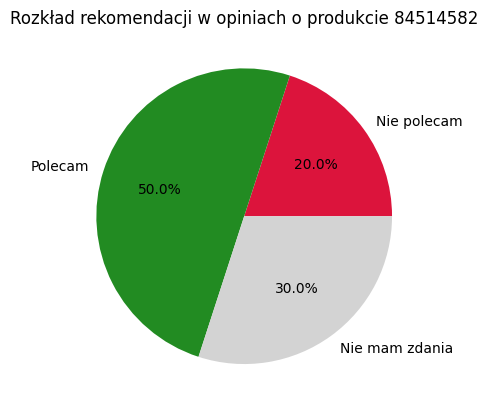

In [38]:
recommendations.plot.pie(
    label = "",
    title = f"Rozkład rekomendacji w opiniach o produkcie {product_id}",
    labels = ["Nie polecam", "Polecam", "Nie mam zdania"],
    colors = ["crimson", "forestgreen", "lightgrey"],
    autopct = "%1.1f%%"
)